In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly

In [2]:
raw_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovers = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
raw_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
def undoCumSum(col):
    temp = pd.Series([0])
    for i in range(len(col[1:])):
        temp[i+1] = col[i+1] - col[i]
    return temp

<AxesSubplot:xlabel='date'>

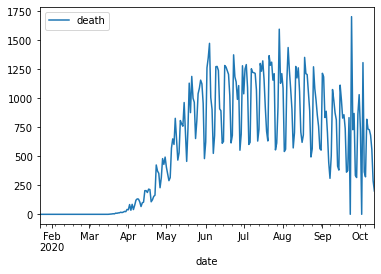

In [4]:
deaths = raw_deaths.loc[raw_deaths['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
deaths = deaths.drop('Country/Region',axis=1)
deaths.columns=['date','death']
deaths['date'] = deaths['date'].map(pd.to_datetime)
deaths.death = deaths.apply(undoCumSum,axis=0).death
deaths.plot(x='date')

<AxesSubplot:xlabel='date'>

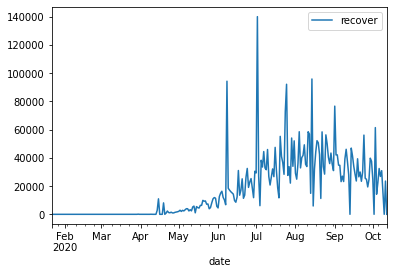

In [5]:
recovers = raw_recovers.loc[raw_recovers['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
recovers = recovers.drop('Country/Region',axis=1)
recovers.columns=['date','recover']
recovers['date'] = recovers['date'].map(pd.to_datetime)
recovers.recover = recovers.apply(undoCumSum,axis=0).recover
recovers.plot(x='date')

<AxesSubplot:xlabel='date'>

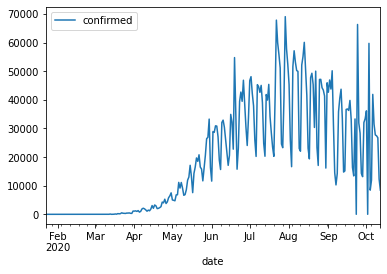

In [6]:
confirmeds = raw_confirmed.loc[raw_confirmed['Country/Region']=='Brazil'].drop(['Province/State','Lat','Long'],axis=1).melt(id_vars='Country/Region')
confirmeds = confirmeds.drop('Country/Region',axis=1)
confirmeds.columns=['date','confirmed']
confirmeds['date'] = confirmeds['date'].map(pd.to_datetime)
confirmeds.confirmed = confirmeds.apply(undoCumSum,axis=0).confirmed
confirmeds.plot(x='date')

In [7]:
print('confirmeds :',confirmeds.confirmed.sum())
print('recovers :',recovers.recover.sum())
print('deaths :',deaths.death.sum())

confirmeds : 5103408
recovers : 4526393
deaths : 150689


In [8]:
data = pd.concat([deaths,recovers,confirmeds],axis=1)
data.columns = ['date', 'death', 'duplicated', 'recover', 'duplicated', 'confirm']
data = data.drop('duplicated',axis=1)
data = data.loc[data.date>='2020/02']

In [12]:
fig = px.bar(data,x='date',y=['death','confirm','recover'],
             color_discrete_sequence=['Crimson','Aqua','Lime'])
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Todos.png",width=1000,height=600)

In [14]:
fig = px.bar(data,x='date',y=['death','confirm'],
             color_discrete_sequence=['Crimson','Aqua','Lime'])
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Mortes_Confirmados.png",width=1000,height=600)

In [13]:
fig = px.bar(data,x='date',y=['death'],color_discrete_sequence=['Crimson'])
fig.add_shape(type='line',x0=pd.to_datetime('2020/02/26'),x1=pd.Timestamp.today(),y0=100,y1=100)
fig.add_trace(go.Scatter(x=[pd.to_datetime('2020/03/15')],y=[150],text='100 pessoas',mode='text',showlegend=False))
fig.update_layout(
    title={'text':"Casos de COVID-19 no Brasil",
           'x':0.5,'xanchor':'center'},
    xaxis_title="Data",
    yaxis_title="Número de casos",
    legend_title="",template = 'xgridoff')
fig.show()
fig.write_image("Mortes.png",width=1000,height=600)